# GENERAL USAGE EXAMPLE
This is a simple example of how to use the DataGenerator, ModelWrapper and Tester classes to train and test the system. Please refer to each class file and to the example_* Jupyter Notebooks for more information.

### Import the required classes and auxiliary libraries

In [1]:
from datagenerator import DataGenerator
from modelwrapper import ModelWrapper
from tester import Tester
import matplotlib.pyplot as plt

Using TensorFlow backend.


### Create the data generators
Note that train and validation generators are DataGenerators, since ModelWrapper requires so. For testing with the Tester, the transect ID is directly used. This makes testing easier.

ModelWrapper also includes a wrapper for the Keras evaluate method that works with data generators. See example_modelwrapper for more info.

In [2]:
trainGenerator=DataGenerator('DATASET/DATA','DATASET/GT',transectList=[0,1,2,3,4,5,6,7],doRandomize=True)
valGenerator=DataGenerator('DATASET/DATA','DATASET/GT',transectList=[9],doRandomize=False)
testTransectNum=8

### Create and train the model
Only 10 epochs are used in this example. Feel free to change the number of epochs and experiment.

In [3]:
theModel=ModelWrapper()
theModel.create()
theModel.train(trainGenerator,valGenerator,10)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Epoch 1/10
96/96 [==============================] - 14s 147ms/step - loss: 0.8368 - acc: 0.6965 - val_loss: 0.5914 - val_acc: 0.7962
Epoch 2/10
96/96 [==============================] - 14s 144ms/step - loss: 0.4828 - acc: 0.7919 - val_loss: 0.5498 - val_acc: 0.8067
Epoch 3/10
96/96 [==============================] - 14s 144ms/step - loss: 0.4219 - acc: 0.8349 - val_loss: 0.4878 - val_acc: 0.8046
Epoch 4/10
96/96 [==============================] - 14s 142ms/step - loss: 0.3658 - acc: 0.8574 - val_loss: 0.4286 - val_acc: 0.8373
Epoch 5/10
96/96 [==============================] - 14s 144ms/step - loss: 0.3295 - acc: 0.8707 - val_loss: 0.4222 - val_acc: 0.8492
Epoch 6/10
96/96 [==============================] - 14s 142ms/step - loss: 0.2948 - acc: 0.8863 - val_loss: 0.3777 - val_acc: 0.8618
Epoc

### Create a tester object
The parameter theModel is the ModelWrapper to test. There are more parameters which are, in this case, left to their default values.

In [4]:
theTester=Tester(theModel)

### Evaluate the test informative image
Only confusion matrix and accuracy are returned. Precision, recall, F1-Score, ... and their per-class variants can be easily computed from the confusion matrix.

In [5]:
confusionMatrix,theAccuracy=theTester.evaluate(testTransectNum)

### Print the results
A good accuracy is obtained even with such a short number of epochs.

In [6]:
print('* CONFUSION MATRIX :')
print(confusionMatrix)
print('* ACCURACY : %.2f' % theAccuracy)

* CONFUSION MATRIX :
[[ 47513   8775   3477]
 [  2250 130575   1298]
 [   428   3780  11977]]
* ACCURACY : 0.90


### Segment the test informative image

In [7]:
theSegmented,theGT,theTransect=theTester.segment(testTransectNum)

### Plot the segmentation results
First row is the SSS data. Second row is the ground truth. Third row is the segmented image.
Tester includes methods to evaluate and plot whole acoustic images involving two informative images (port and starboard). See example_tester.ipynb and Tester.py for more information.

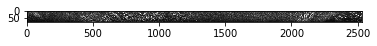

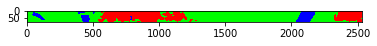

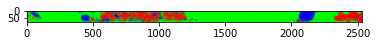

In [8]:
plt.imshow(theTransect,cmap='gray',vmin=0,vmax=1)
plt.show()
plt.imshow(theGT)
plt.show()
plt.imshow(theSegmented)
plt.show()